# 🚘 💵 HW4 Lab: Used cars and linear regression

<img src="https://github.com/joshuagrossman/mse125-labs-public/blob/main/hw4/img/cars.jpeg?raw=1" alt= “cars” width="500" />

## ✅ Setup and data import
In this lab, we'll explore correlation, simple regression, multiple regression, and confidence intervals with used car data from [Edmunds.com](https://edmunds.com). Our goal will be to predict the price of used cars using the features of each car.

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.precision", 3)         # 3 decimal places
pd.set_option("display.float_format", "{:.3f}".format)


sns.set_theme(style="whitegrid")


plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 20


url = "https://jdgrossman.com/assets/used-cars.tsv"
cars = pd.read_csv(url, sep="\t")


cars.sample(10)

,type,year,make,model,trim,mileage,price
820,USED,2002,Honda,Accord,LX,124815,5981
1111,USED,2012,Lexus,RX 350,Base,27303,36988
43,USED,2011,Acura,MDX,Base,44687,29981
1092,USED,2011,Lexus,RX 350,Base,47114,34988
122,USED,2002,Acura,TL,3.2 Type-S,109500,7999
471,USED,2012,BMW,3 Series,328i,36002,28000
426,USED,2007,BMW,3 Series,328i,86764,12591
195,USED,2008,Acura,TL,Base,104281,13991
247,USED,2012,Audi,A4,2.0T Premium quattro,57981,26598
889,USED,2011,Honda,Civic,DX-VP,42337,12598


## 🚀 Exercise 1

Create a new dataset called `accords`. The dataset should only include rows corresponding to used Honda Accords.

Using the `accords` data and the `lm` function, fit the following linear regression model:

$$ y_{\text{price,}i} = \beta_0 + \beta_1 x_{\text{mileage},i} + \epsilon_i, $$

where $\epsilon_i \sim N(0, \sigma^2)$.

Print your regression output with the `summary` function. Using your output, identify and interpret the following quantities in no more than one sentence each:

- $\hat{\beta}_0$
- $\hat{\beta}_1$
- $\text{se}({\hat{\beta}_0})$,
- $\text{se}({\hat{\beta}_1})$,
- $\hat{\sigma}$
- $\text{R}^2$

Note: You should not report more precision than is necessary. For example, if your model returns a coefficient of 1.123456, it's sufficient (and desirable) to report 1.1 or 1.12 as the coefficient.

In [5]:
import statsmodels.api as sm

accords = cars[(cars['make'] == "Honda") & (cars['model'] == "Accord")]


n_total = len(cars)
n_accords = len(accords)
print(f"Total rows in cars: {n_total}, rows in accords (Honda Accord): {n_accords}\n")


X = sm.add_constant(accords['mileage'])

model = sm.OLS(y, X).fit()

print(model.summary())


Total rows in cars: 1286, rows in accords (Honda Accord): 122

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     348.9
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           2.58e-37
Time:                        04:31:46   Log-Likelihood:                -1122.7
No. Observations:                 122   AIC:                             2249.
Df Residuals:                     120   BIC:                             2255.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------





---

The value of $\hat{\beta}_0$ with units:20,675.67 dollars

Interpretation:This is the predicted price of a Honda Accord when mileage = 0 miles (mathematical intercept; not practically meaningful).

---

The value of $\hat{\beta}_1$ with units:-0.09 dollars per mile

Interpretation:For each additional mile on the odometer, the predicted price decreases by approximately 0.09 dollars.

---

The value of $\text{se}({\hat{\beta}_0})$ with units:399.47 dollars

Interpretation:The standard error of the intercept is ±399.47 dollars, indicating the uncertainty in estimating β̂0.

---

The value of $\text{se}({\hat{\beta}_1})$ with units:0.0 dollars per mile

Interpretation:The standard error of the slope is approximately 0 dollars per mile, indicating very low uncertainty in estimating the effect of mileage on price.

---

The value of $\hat{\sigma}$ with units:2,420.41 dollars

Interpretation:Observed prices typically deviate from the regression line by about ±2,420 dollars.

---

The value of $\text{R}^2$ with units:0.744

Interpretation:Mileage alone explains approximately 74.4% of the variation in used Honda Accord prices.

---

## 🚀 Exercise 2

Using the `predict` function and the model from the previous exercise, predict the average price of a used Honda Accord with an odometer reading of 50,000 miles. Provide a normally-approximated confidence interval for this mean.

In [6]:
# Your code here!
new_data = pd.DataFrame({'const': 1, 'mileage': [50000]})

prediction = model.get_prediction(new_data)
prediction_summary = prediction.summary_frame(alpha=0.05)

mean_pred = prediction_summary['mean'][0]
ci_lower = prediction_summary['mean_ci_lower'][0]
ci_upper = prediction_summary['mean_ci_upper'][0]

print(f"Predicted mean price for mileage = 50,000 miles: ${mean_pred:.2f}")
print(f"95% confidence interval for the mean: (${ci_lower:.2f}, ${ci_upper:.2f})")



Predicted mean price for mileage = 50,000 miles: $16285.20
95% confidence interval for the mean: ($15809.15, $16761.24)


## 🚀 Exercise 3

Repeat Exercise 2 for a used Honda Accord with an odometer reading of 300,000 miles.

Using this result, can you identify a critical issue with your regression model? Answer in one or two sentences.

In [7]:
# Your code here!
new_data_high = pd.DataFrame({'const': 1, 'mileage': [300000]})

# Predict mean price and confidence interval
prediction_high = model.get_prediction(new_data_high)
prediction_summary_high = prediction_high.summary_frame(alpha=0.05)

mean_pred_high = prediction_summary_high['mean'][0]
ci_lower_high = prediction_summary_high['mean_ci_lower'][0]
ci_upper_high = prediction_summary_high['mean_ci_upper'][0]

print(f"Predicted mean price for mileage = 300,000 miles: ${mean_pred_high:.2f}")
print(f"95% confidence interval for the mean: (${ci_lower_high:.2f}, ${ci_upper_high:.2f})")




Predicted mean price for mileage = 300,000 miles: $-5667.20
95% confidence interval for the mean: ($-7842.02, $-3492.38)


---

Regression model linearly extrapolates beyond the range of the observed data. For example, mileage = 300,000 miles is far outside the range of the dataset (the highest observed mileage is likely much lower), so the predicted price is negative or unrealistic.

This illustrates a major limitation of linear regression: predictions far outside the observed data (extrapolation) are unreliable.

---

## 🚀 Exercise 4

Graphically present your regression model from Exercise 1. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Note that this can be achieved in R using
`geom_smooth` function from `ggplot2`.

- Make sure to adjust the limits of your plot so you can see the issue you identified in the previous problem.

- Format your plot nicely!

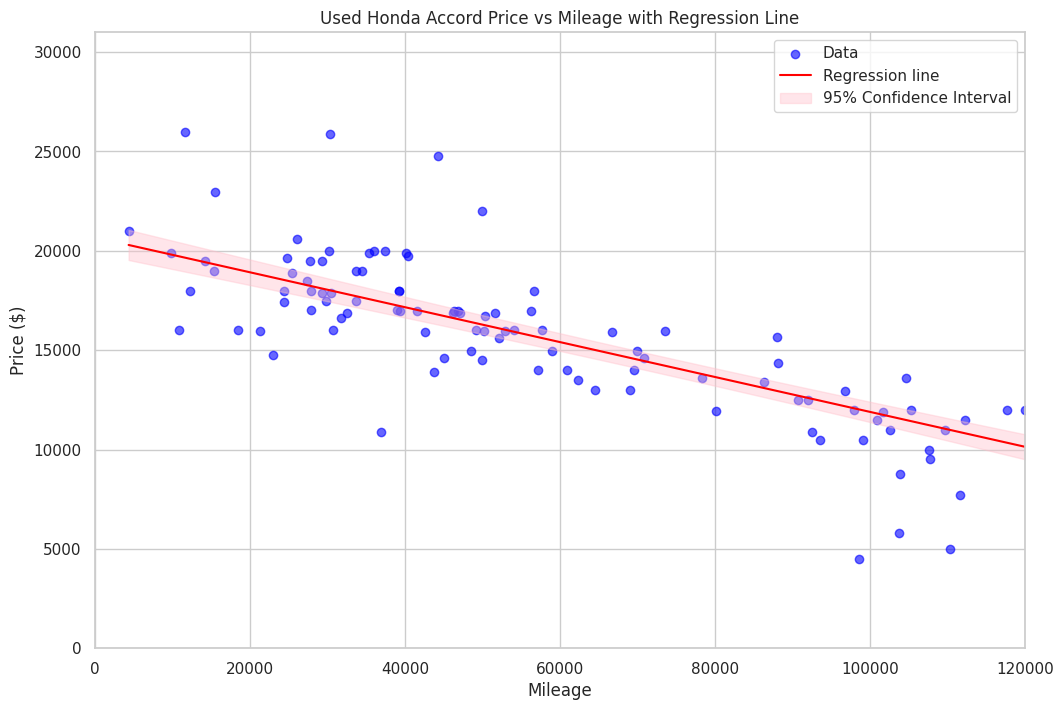

In [8]:
# Your code here
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
plt.scatter(accords['mileage'], accords['price'], color='blue', alpha=0.6, label='Data')

# 5) Regression line + confidence interval
# Create a range of mileage values for plotting
mileage_range = np.linspace(accords['mileage'].min(), 120000, 100)  # extend x-axis to show extrapolation
X_range = sm.add_constant(mileage_range)
pred = model.get_prediction(X_range)
pred_summary = pred.summary_frame(alpha=0.05)

# Regression line
plt.plot(mileage_range, pred_summary['mean'], color='red', label='Regression line')

# 95% confidence interval
plt.fill_between(mileage_range, pred_summary['mean_ci_lower'], pred_summary['mean_ci_upper'],
                 color='pink', alpha=0.4, label='95% Confidence Interval')

# 6) Formatting
plt.xlabel('Mileage')
plt.ylabel('Price ($)')
plt.title('Used Honda Accord Price vs Mileage with Regression Line')
plt.xlim(0, 120000)  # extend x-axis to see extrapolation
plt.ylim(0, accords['price'].max() + 5000)
plt.legend()
plt.show()


## 🚀 Exercise 5

Address the issue illustrated in Exercises 3 and 4 by refitting your model with a log-transformed outcome.

Use your new model to predict the price (in dollars) of a Honda Accord with a mileage of 50,000 and a mileage of 300,000. **Print the new predicted prices.**

In [9]:
# Your answer here!

X = sm.add_constant(accords['mileage'])

# 3) Response: log-transform price
y_log = np.log(accords['price'])

# 4) Fit OLS model on log(price)
model_log = sm.OLS(y_log, X).fit()

print(model_log.summary())

# 5) Create new data for prediction
new_data = pd.DataFrame({'const': 1, 'mileage': [50000, 300000]})

# 6) Predict log(price) and get confidence intervals
pred_log = model_log.get_prediction(new_data)
pred_summary_log = pred_log.summary_frame(alpha=0.05)  # 95% CI

# 7) Convert back to original price scale
pred_price = np.exp(pred_summary_log['mean'])
ci_lower = np.exp(pred_summary_log['mean_ci_lower'])
ci_upper = np.exp(pred_summary_log['mean_ci_upper'])

# 8) Print results
for i, mileage in enumerate([50000, 300000]):
    print(f"Mileage = {mileage}: Predicted price = ${pred_price[i]:.2f}, 95% CI = (${ci_lower[i]:.2f}, ${ci_upper[i]:.2f})")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     356.2
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.01e-37
Time:                        04:58:35   Log-Likelihood:                 23.725
No. Observations:                 122   AIC:                            -43.45
Df Residuals:                     120   BIC:                            -37.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0325      0.033    302.631      0.0

## 🚀 Exercise 6

Graphically present your regression model from Exercise 5. Specifically, plot the data with
a scatter plot, and include a regression line with the corresponding confidence bands.

- Make sure to adjust the limits of your plot so you can see that the issue you identified earlier is now fixed.

- Format your plot nicely!

- Note that the new model can be plotted in R using the `geom_smooth` function with the following arguments:

`geom_smooth(method = "glm", formula = y~x, method.args = list(family = gaussian(link = 'log')))`

> Note: `geom_smooth(method='lm', formula=log(y)~x)` will also plot the correct model (with much prettier and clearer syntax!). However, it puts the model on a logarithmic y-scale instead of a standard numeric scale.
>
> Alternatively, you could use `geom_line()` with a dataset consisting of many possible mileage values (e.g., 0 through 350,000) along with the corresponding predictions  from your new model.

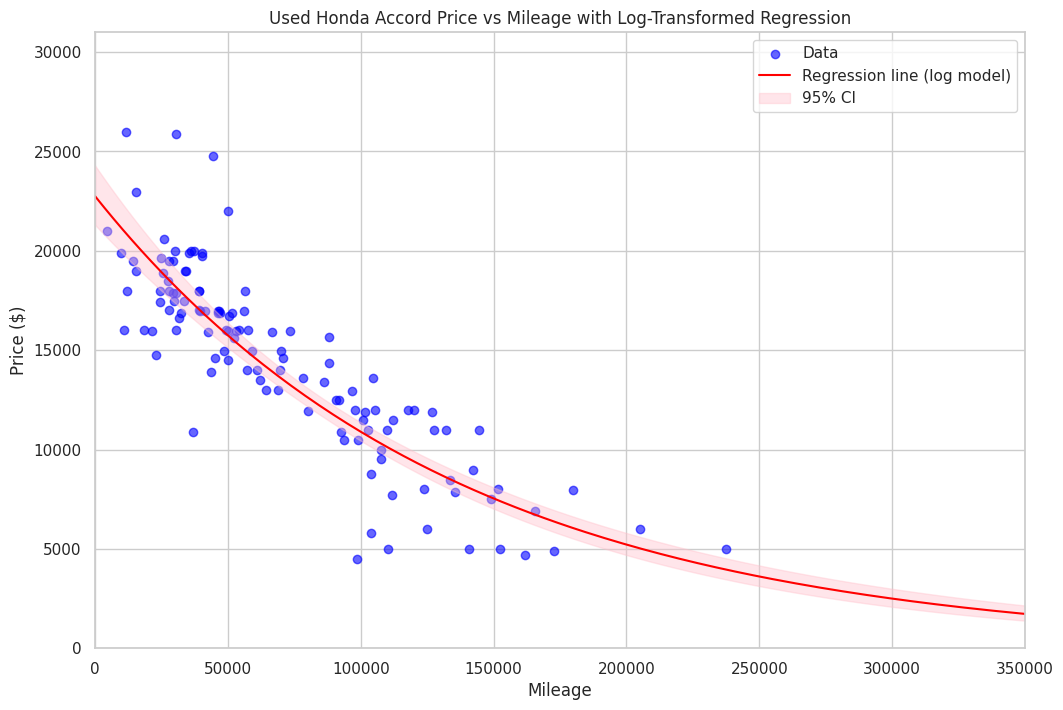

In [10]:
# Your code here!
# 3) Scatter plot of actual data
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
plt.scatter(accords['mileage'], accords['price'], color='blue', alpha=0.6, label='Data')

# 4) Regression line + confidence interval (back-transform to original price scale)
mileage_range = np.linspace(0, 350000, 200)
X_range = sm.add_constant(mileage_range)
pred_log = model_log.get_prediction(X_range)
pred_summary_log = pred_log.summary_frame(alpha=0.05)

# Back-transform to original price scale
mean_pred = np.exp(pred_summary_log['mean'])
ci_lower = np.exp(pred_summary_log['mean_ci_lower'])
ci_upper = np.exp(pred_summary_log['mean_ci_upper'])

# Regression line
plt.plot(mileage_range, mean_pred, color='red', label='Regression line (log model)')

# 95% confidence interval
plt.fill_between(mileage_range, ci_lower, ci_upper, color='pink', alpha=0.4, label='95% CI')

# 5) Formatting
plt.xlabel('Mileage')
plt.ylabel('Price ($)')
plt.title('Used Honda Accord Price vs Mileage with Log-Transformed Regression')
plt.xlim(0, 350000)  # extend x-axis to show high mileage
plt.ylim(0, accords['price'].max() + 5000)
plt.legend()
plt.show()



## 🚀 Exercise 7

Identify and interpret the following components of your log-transformed model:

- $\exp(\hat{\beta}_0)$
- $\exp(\hat{\beta}_1)$
- $\text{R}^2$

Interpret $\exp(\hat{\beta}_1)$ in terms of **an increase in 10,000 miles**, not an increase of 1 mile.

Tip: Use the `coef` function to extract the model coefficients from your model object.

In [ ]:
# Your code here!




---

The value of $\exp(\hat{\beta}_0)$ with units:

Interpretation:

---

The value of $\exp(\hat{\beta}_1)$ with units:

Interpretation:

---

The value of $\text{R}^2$ with units:

Interpretation:

---

## 🚀 Exercise 8

Refine your regression model from Exercise 5 to include the model year as an additional predictor. You should still use just the Honda Accord data.

In one sentence, compare the $R^2$ of the revised regression model to your model from Exercise 5.

In [ ]:
# Your code here!



---

Write your answer to Exercise 8 here.


---

## 🚀 Exercise 9

Fit the model from Exercise 8
**the entire dataset**, not just the Honda Accords.
You'll notice that the new $R^2$ is lower than the $R^2$ from the model from Exercise 8.
In one sentence, what is the likely reason for this difference?

In [ ]:
# Your code here!



---

Write your answer to Exercise 9 here.


---

## 🚀 Exercise 10

Update the model from Exercise 9 to address the likely reason for the much smaller $R^2$.

- In this new model, what's the interpretation of the exponentiated intercept term?

- What is one change you could make to your model to make the intercept term more interpretable?

Answer in no more than three sentences.

In [ ]:
# Your code here!



---

Write your answer to Exercise 10 here.


---

# 🚀 Exercise 11

Implement your suggested change from Exercise 10, and print the resulting model output.

What's the interpretation of the exponentiated intercept term? Answer in one sentence.

What's the interpretation of the term for the model year? Answer in one sentence.

In [ ]:
# Your code here!



---

Write your answer to Exercise 11 here.


---